In [14]:
%pip install sklearn


  Using cached sklearn-0.0.post11.tar.gz (3.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'


  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [18 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
      
      More information is available at
      https://github.com/scikit-learn/sklearn-pypi-packag

In [15]:
import pandas as pd
import numpy as np
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :],    #행을 두줄 단위로 파싱, 모든 열 가져옴
                  raw_df.values[1::2, :2]]) #행을 1번째 줄을 시작으로 두줄 단위로 파싱, 0열과 2열 가져옴 = 0열부터 2열?
target = raw_df.values[1::2, 2] # 1행부터 2줄단위로, 2번열
combined_data = np.hstack([data, target.reshape(-1, 1)])
boston_df = pd.DataFrame(combined_data)
column_names = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "PRICE"]
boston_df.columns = column_names

In [16]:
print('보스톤 주택 가격 데이터셋 크기: ', boston_df.shape)
print()
boston_df.info()

보스톤 주택 가격 데이터셋 크기:  (506, 14)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

#X, Y 분할하기
Y = boston_df['PRICE']
X = boston_df.drop(['PRICE'], axis = 1, inplace = False)

#훈련용 데이터와 평가용 데이터 분할하기
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 156)

In [18]:
# 참고
from sklearn.model_selection import train_test_split
train_test_split(arrays, test_size, train_size, random_state, shuffle, stratify)

NameError: name 'arrays' is not defined

In [ ]:
#선형 회귀 분석 : 모델 생성
lr = LinearRegression()

#선형 회귀 분석 : 모델 훈련
lr.fit(X_train, Y_train)

LinearRegression()

In [ ]:
#선형 회귀 분석 : 평가 데이터에 대한 예측 수행 -> 예측 결과 Y_predict 구하기
Y_predict = lr.predict(X_test)

In [ ]:
mse = mean_squared_error(Y_test, Y_predict)
rmse = np.sqrt(mse)
print('MSE : {0:.3f}, RMSE : {1:.3f}'.format(mse, rmse))
print('R^2(Variance score) : {0:.3f}'.format(r2_score(Y_test, Y_predict)))

print()

print('Y 절편 값: ', lr.intercept_)
print('회귀 계수 값: ', np.round(lr.coef_, 1))

MSE : 17.297, RMSE : 4.159
R^2(Variance score) : 0.757

Y 절편 값:  40.995595172164336
회귀 계수 값:  [ -0.1   0.1   0.    3.  -19.8   3.4   0.   -1.7   0.4  -0.   -0.9   0.
  -0.6]


In [ ]:
coef = pd.Series(data = np.round(lr.coef_, 2), index = X.columns)
coef.sort_values(ascending = False)

RM          3.35
CHAS        3.05
RAD         0.36
ZN          0.07
INDUS       0.03
AGE         0.01
B           0.01
TAX        -0.01
CRIM       -0.11
LSTAT      -0.57
PTRATIO    -0.92
DIS        -1.74
NOX       -19.80
dtype: float64

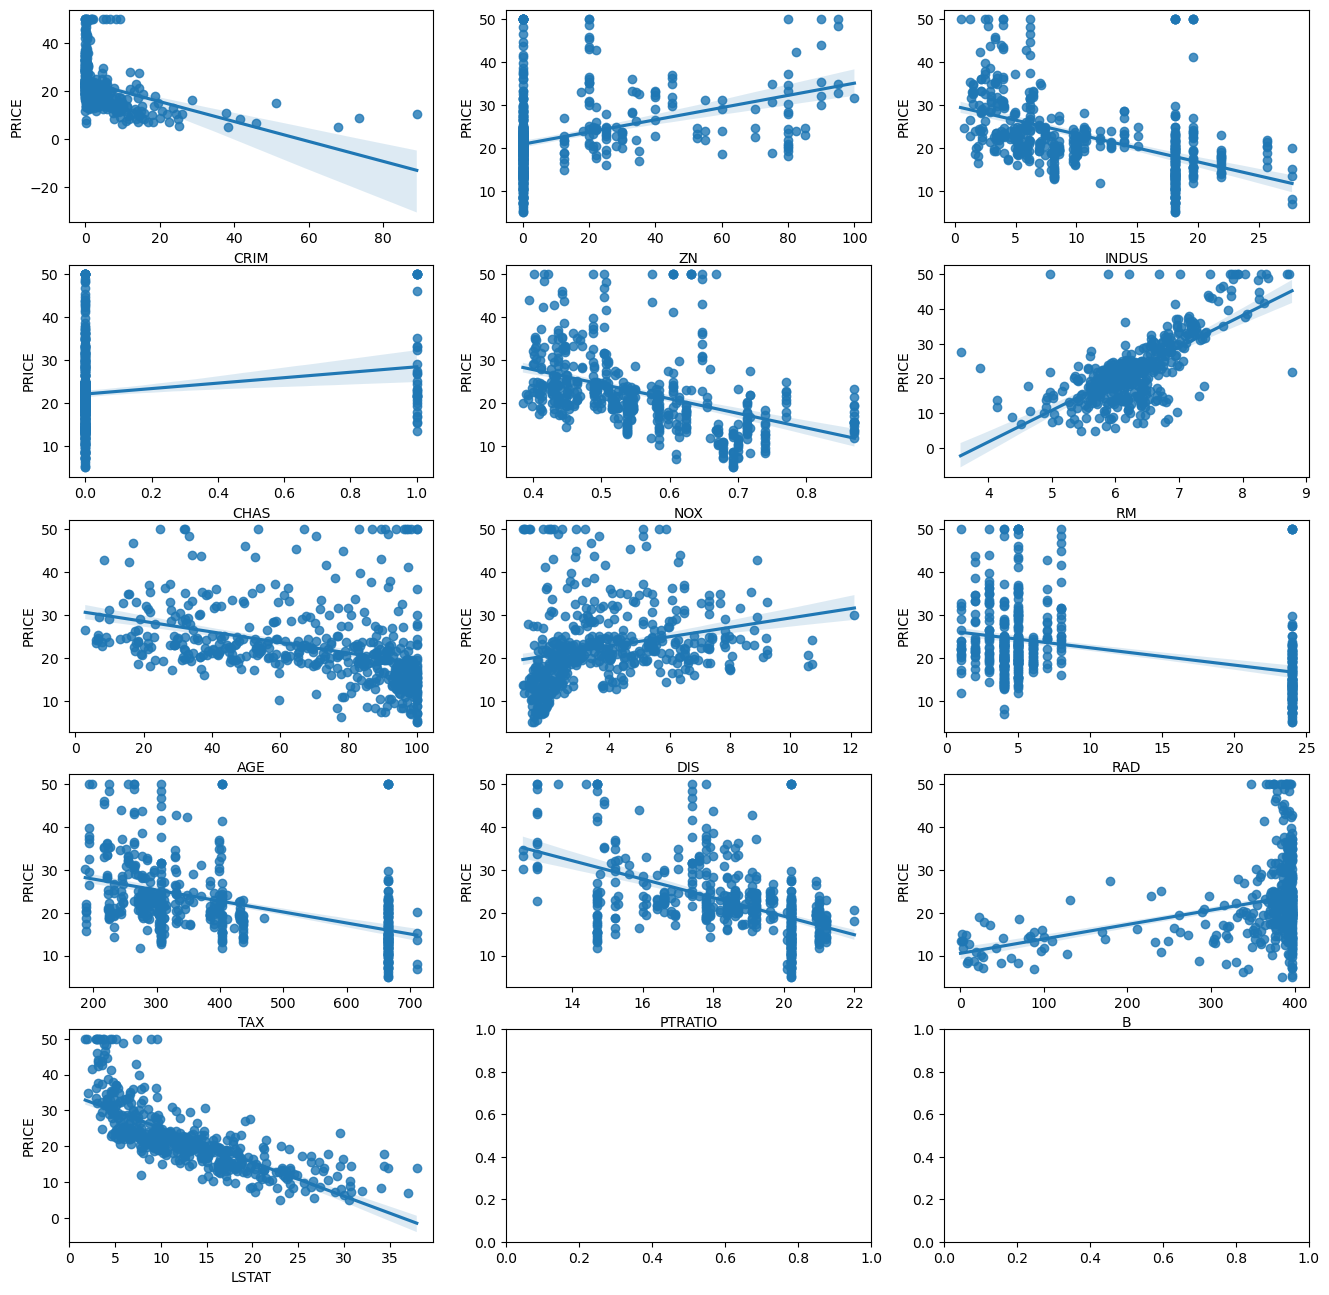

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(figsize = (16, 16), ncols = 3, nrows = 5)
x_features = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']

for i, feature in enumerate(x_features):
    row = int(i/3)
    col = i%3
    sns.regplot(x = feature, y = 'PRICE', data = boston_df, ax = axs[row][col])
    
plt.show()

In [ ]:
import numpy as np
import pandas as pd
data_df = pd.read_csv('data/auto-mpg.csv', header = 0, engine = 'python') #lms에서 받으면 기존내용 생략

print('데이터셋 크기: ', data_df.shape)
data_df.head()

데이터셋 크기:  (398, 8)


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1


In [ ]:
# 마력제외하는 이유 -> 누락치가 있어서 제거
data_df = data_df.drop(['origin', 'horsepower'], axis = 1, inplace = False)
data_df.head()

,mpg,cylinders,displacement,weight,acceleration,model_year
0,18.0,8,307.0,3504,12.0,70
1,15.0,8,350.0,3693,11.5,70
2,18.0,8,318.0,3436,11.0,70
3,16.0,8,304.0,3433,12.0,70
4,17.0,8,302.0,3449,10.5,70


In [ ]:
print('데이터셋 크기: ', data_df.shape)

데이터셋 크기:  (398, 6)


In [ ]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   weight        398 non-null    int64  
 4   acceleration  398 non-null    float64
 5   model_year    398 non-null    int64  
dtypes: float64(3), int64(3)
memory usage: 18.8 KB


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

#X, Y 분할하기
Y = data_df['mpg']
X = data_df.drop(['mpg'], axis = 1, inplace = False)

#훈련용 데이터와 평가용 데이터 분할하기
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

In [ ]:
#선형 회귀 분석 : 모델 생성
lr = LinearRegression()

#선형 회귀 분석 : 모델 훈련
lr.fit(X_train, Y_train)

LinearRegression()

In [ ]:
#선형 회귀 분석 : 평가 데이터에 대한 예측 수행 -> 예측 결과 Y_predict 구하기
Y_predict = lr.predict(X_test)

In [ ]:
mse = mean_squared_error(Y_test, Y_predict)
rmse = np.sqrt(mse)
print('MSE : {0:.3f}, RMSE : {1:.3f}'.format(mse, rmse))
print('R^2(Variance score) : {0:.3f}'.format(r2_score(Y_test, Y_predict)))

MSE : 12.278, RMSE : 3.504
R^2(Variance score) : 0.808


In [ ]:
print('Y 절편 값: ', np.round(lr.intercept_, 2))
print('회귀 계수 값: ', np.round(lr.coef_, 2))

Y 절편 값:  -17.55
회귀 계수 값:  [-0.14  0.01 -0.01  0.2   0.76]


In [ ]:
coef = pd.Series(data = np.round(lr.coef_, 2), index = X.columns)
coef.sort_values(ascending = False)

model_year      0.76
acceleration    0.20
displacement    0.01
weight         -0.01
cylinders      -0.14
dtype: float64

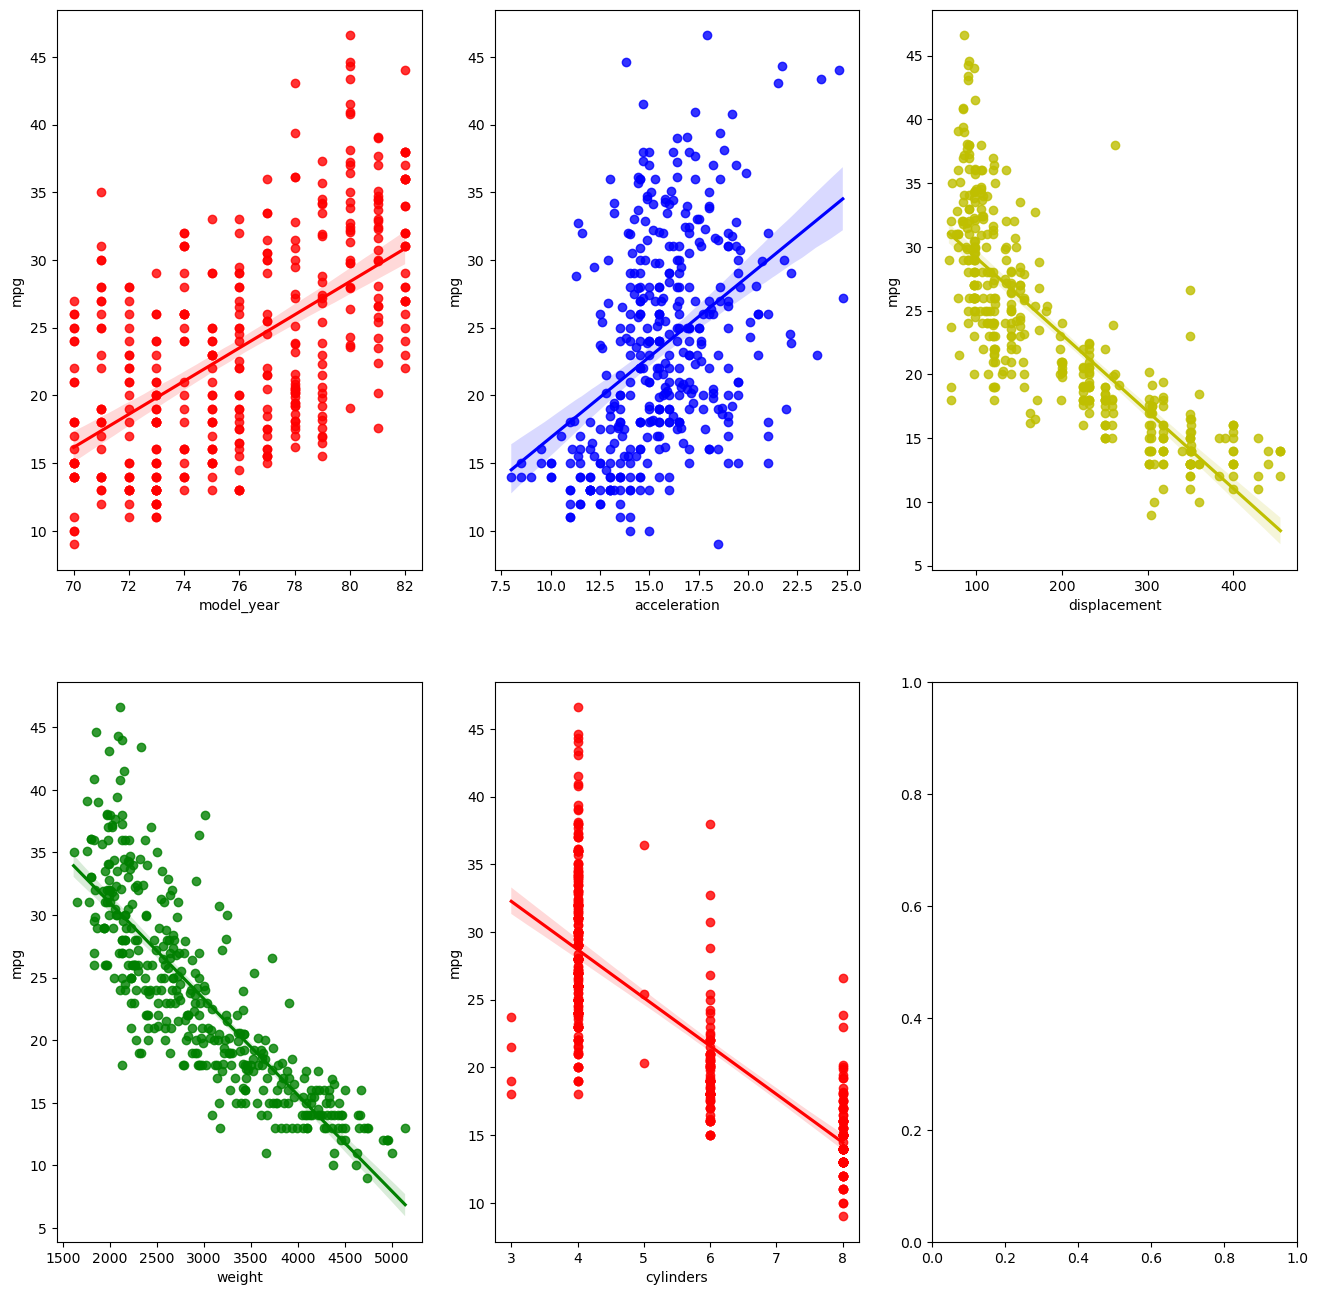

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(figsize = (16, 16), ncols = 3, nrows = 2)
x_features = ['model_year', 'acceleration', 'displacement', 'weight', 'cylinders']
plot_color = ['r', 'b', 'y', 'g', 'r']
for i, feature in enumerate(x_features):
    row = int(i/3)
    col = i%3
    sns.regplot(x = feature, y = 'mpg', data = data_df, ax = axs[row][col], color = plot_color[i])
                
plt.show()

In [ ]:
print("연비를 예측하고 싶은 차의 정보를 입력해주세요.")
# cylinders_1 = int(input("cylinders : "))
# displacement_1 = int(input("displacement : "))
# weight_1 = int(input("weight : "))
# acceleration_1 = int(input("acceleration : "))
# model_year_1 = int(input("model_year : "))

cylinders_1, displacement_1 , weight_1 , acceleration_1 , model_year_1 = 8, 350, 3200, 22, 99

연비를 예측하고 싶은 차의 정보를 입력해주세요.


In [ ]:
mpg_predict = lr.predict([[cylinders_1, displacement_1, weight_1, acceleration_1 , model_year_1]])
print("이 자동차의 예상 연비(MPG)는 %.2f입니다." %mpg_predict)

이 자동차의 예상 연비(MPG)는 41.32입니다.


c:\Users\kiw\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Quiz. horsepower를 포함하여 회귀 분석을 하는 방법은?

In [2]:
import numpy as np
import pandas as pd
data_df = pd.read_csv('data/auto-mpg.csv', header = 0, engine = 'python') #lms에서 받으면 기존내용 생략

print('데이터셋 크기: ', data_df.shape, end='\n\n')

data_df = data_df.drop(['origin'], axis = 1, inplace = False)
data_df.info()

데이터셋 크기:  (398, 8)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
dtypes: float64(3), int64(3), object(1)
memory usage: 21.9+ KB


In [ ]:
data_df['horsepower'] = data_df['horsepower'].replace('?',0)
data_df['horsepower'] = data_df['horsepower'].replace('?',0)

In [ ]:
horsepower_column = data_df['horsepower']
horsepower_column

0      130
1      165
2      150
3      150
4      140
      ... 
393     86
394     52
395     84
396     79
397     82
Name: horsepower, Length: 398, dtype: object

In [ ]:
count_question_mark = (data_df['horsepower'] == '?').sum()
count_question_mark

6

In [3]:
data_df = data_df[data_df['horsepower'] != '?']
data_df = data_df.reset_index(drop=True)
data_df['horsepower'] = data_df['horsepower'].astype('float64')

data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
dtypes: float64(4), int64(3)
memory usage: 21.6 KB


In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

#X, Y 분할하기
Y = data_df['mpg']
X = data_df.drop(['mpg'], axis = 1, inplace = False)

#훈련용 데이터와 평가용 데이터 분할하기
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

lr = LinearRegression()
lr.fit(X_train, Y_train)

LinearRegression()

In [5]:
#선형 회귀 분석 : 평가 데이터에 대한 예측 수행 -> 예측 결과 Y_predict 구하기
Y_predict = lr.predict(X_test)

mse = mean_squared_error(Y_test, Y_predict)
rmse = np.sqrt(mse)
print('MSE : {0:.3f}, RMSE : {1:.3f}'.format(mse, rmse))
print('R^2(Variance score) : {0:.3f}'.format(r2_score(Y_test, Y_predict)))

MSE : 12.406, RMSE : 3.522
R^2(Variance score) : 0.798


In [13]:
print('Y 절편 값: ', np.round(lr.intercept_, 2))
print('회귀 계수 값: ', np.round(lr.coef_, 2))

Y 절편 값:  -12.14
회귀 계수 값:  [-0.28  0.   -0.   -0.01  0.05  0.72]


In [22]:
# 차 정보
cylinders_1, displacement_1, horsepower_1, weight_1 , acceleration_1 , model_year_1 = 8, 350, 200, 3200, 22, 99

mpg_predict = lr.predict([[cylinders_1, displacement_1, horsepower_1, weight_1, acceleration_1 , model_year_1]])
print("이 자동차의 예상 연비(MPG)는 %.2f입니다." %mpg_predict)

이 자동차의 예상 연비(MPG)는 38.30입니다.


c:\Users\kiw\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
